#EM(期望最大)算法与高斯混合模型(GMM)

#1 概述

##1.1 概述
EM算法本质上来说是一种寻找问题最优解的优化算法，高斯混合模型是EM算法的一个典型的应用场景。
常见的寻找问题最优解的方法：
- EM算法
- 梯度下降法 - 线性回归
- 坐标上升法 - 支持向量机
- 极大似然估计 - 逻辑回归

EM算法是一个无监督算法，一种聚类的算法。这个算法思想简单，但是推导复杂。它的本质就是极大似然估计法求解未知参数的最优解。极大似然估计是求解参数的最优解，EM算法对其进行了推广，能够叫它处理更复杂的问题，这些问题中多了一些隐变量。

##1.2 应用场景
- 高斯混合模型
- K-Means聚类
- HMM-隐马尔可夫模型

比如观察人的身高，符合正态分布，那么参数就有两个$(\mu,\sigma^2)$,我们现在有100个男性的身高和100个女性的身高,那么求解均值和标准差的过程就是估计高斯分布的参数,可以直接根据公式$\hat{\mu}=\frac{1}{n}\sum_{i=1}^nx_i=\overline{x}$,$\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n(x_i-\overline{x})^2$.

上述问题中，我们是性别已知的，但是如果我们收集了200个人的身高，而性别未知，又该如何处理？这样就涉及到了两个分布、两个分布的参数.那么首先需要先性别估计，然后才能估计高斯分布.这个时候就需要用到EM算法，性别估计的参数就是隐变量

这个时候，对于每一个样本或者你抽取到的人，就有两个东西需要猜测或者估计的了，一是这个人是男的还是女的？二是男生和女生
对应的身高的高斯分布的参数是多少？

只有当我们知道了哪些人属于同一个高斯分布的时候，我们才能够对这个分布的参数作出靠谱的预测，例如刚开始的最大似然所说的
，但现在两种高斯分布的人混在一块了，我们又不知道哪些人属于第一个高斯分布，哪些属于第二个，所以就没法估计这两个分布的
参数。反过来，只有当我们对这两个分布的参数作出了准确的估计的时候，才能知道到底哪些人属于第一个分布，那些人属于第二个
分布。

#1.3 EM算法和坐标上升法的对比
EM算法就是这样，假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A。可以考虑首先赋予A某种初值，以此得到B的估计值，然后从B的当前值出发，重新估计A的取值，这个过程一直持续到收敛为止。

这里把每个人的完整描述看做是三元组$y_i=\{x_i,z_{i1},z_{i2}\}$，其中，$x_i$是第i个样本的观测值，也就是对应的这个人的身高，是可以观测到的值。$z_{i1}$和$z_{i2}$表示男生和女生这两个高斯分布中哪个被用来产生值$x_i$，就是说这两个值标
记这个人到底是男生还是女生（的身高分布产生的）。这两个值我们是不知道的，是隐含变量。确切的说，$z_{ij}$在$x_i$由第j
个高斯分布产生时值为1，否则为0。例如一个样本的观测值为1.8，然后他来自男生的那个高斯分布，那么我们可以将这个样本表示为{1.8, 1, 0}。如果$z_{i1}$和$z_{i2}$的值已知，也就是说每个人我已经标记为男生或者女生了，那么我们就可以利用上面说的最大似然算法来估计他们各自高斯分布的参数。但是它们未知，因此我们只能用EM算法

- 坐标上升法：假设我们想估计知道A和B两个参数，在开始状态下二者都是未知的，但如果知道了A的信息就可以得到B的信息，反过来知道了B也就得到了A
- EM算法：首先赋予A初始值，以此得到B的估计值，然后从B的当前值触发，重新估计A的取值，这个过程一直持续到收敛为止

EM算法本质上就是一个坐标上升法

##1.4 EM算法和K-Means算法的对比
K-Means算法是一种聚类算法，它最后得到的结果会把样本唯一的分到一类中，而EM算法最后得到的是这个样本属于任何一种分类的概率

#2. EM算法思想
对于未知性别的估计，高斯概率密度函数要求知道两个参数，就可以知道具体的性别；极大似然要求知道性别，就能知道高斯分布参数。这就陷入了死循环。所以就引入了EM算法。

EM算法分为E(Exception)步和M(Maximization)步。

###2.1 Exception
先随便假设各个正态分布参数(对于身高的例子来说，就是$\mu$,$\sigma^2$).求出多项分布参数；
比如身高的例子，现在我们只涉及到两个高斯分布，一个是男性身高，一个是女性身高，有$H_m(\mu_m,\sigma^2_m)$和$H_w(\mu_w,\sigma^2_w)$，那我们就先假定男性身高$\mu=170,\sigma^2=0.1$,女性身高$\mu=150,\sigma^2=0.2$，那么对于一个具体的人，由于知道它的样本，根据这个假定我们就可以求出这个人是男性的概率值$P(m|x_i)$，以及是女性的概率是$P(w|x_i)$，但是这两个概率的和不一定等于1，我们需要做一个归一化操作$P(m|x_i)=\frac{P(m|x_i)}{P(m|x_i)+P(w|x_i)}$,$P(w|x_i)=\frac{P(m|x_i)}{P(m|x_i)+P(w|x_i)}$

###2.2 Maximization
用E步得到的多项分布参数，重新估计正态分布的参数，使得联合密度的似然估计最大。这个时候，两个分布的概率就变了，接着继续调整E步和M步，如此反复直到收敛

#3 随机变量的函数的期望
定理：设随机变量Y是随机变量X的函数$Y=g(X)$，这里g是连续函数，那么

1. 若X是离散型随机变量，且X的概率分布为$P\{X=x_i\}=p_i, i=1,2,...,n$,则Y的期望$E(Y)=E[g(X)]=\sum_{i=1}^ng(x_i)p_i$

2. 若X是连续型随机变量，且概率密度为f(x),则Y的期望$E(Y)=E[g(x)]=\lmoustache_{-\infty}^{+\infty}g(x)f(x)dx$

$\sum_{z^(i)}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}); \theta}{Q_i(z^{(i)})}$就一个随机变量函数的期望

#4 EM算法推导
假设我们有一个样本集${x^(1),...,x^(m)}$,包含m个独立的样本。但每个样本i对应的类别$z^(i)$是未知的(相当于聚类)，也即隐变量。故我们需要估计概率模型$p(x,z)$的参数$\theta$，但是由于里面包含隐变量z，所以很难用极大似然估计求解，但如果z知道了，那我们就容易求解了。

对于参数估计，我们本质上还是想获得一个使似然函数最大化的那个参数$\theta$，现在与最大似然不同的只是似然函数式中多了一个未知的变量z。也就是说我们的目标是找到适合的$\theta$和z让$L(\theta)$最大。那我们也许会想，你就是多了一个未知的变量而已啊，我也可以分别对未知的$\theta$和z分别求偏导，再令其等于$\theta$，求解出来不也一样吗？

## 4.1 极大似然函数
我们知道极大似然函数为$L(\theta)=L(x_1,x_2,...,x_n;\theta)=\prod_{i=1}^np(x_i;\theta),\theta \in \Theta$，为了求导方便两边取对数，有$lnL(\theta)=\sum_{i=1}^nlogp(x_i;\theta)$，加入隐变量后变为:$\sum\limits_ilog\sum\limits_{z^{{i}}}p(x^{(i)}, z^{(i)}; \theta)$。本质上，我们需要使得上述式子最大化，但是可以看到里面有“和的对数”，求导后形式会非常复杂（自己可以想象下$log(f_1(x)+ f_2(x)+ f_3(x)+…)$复合函数的求导），所以很难求解得到未知参数z和$\theta$。那么我们转化为：$=\sum_ilog\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$，依然还是和的对数。我们还需要变换，根据Jensen不等式，可以有$\geq \sum\limits_i\sum\limits_{z^{{i}}}Q_i(z^{(i)})*log\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$。这就变成了对数的和，求导就方便多了。由于我们需要求的是上述式子的最大值，所以只考虑什么时候相等。

##4.2 Jenson不等式
对于一个随机变量X：

- 如果f是凸函数，那么$E[f(X)]>=f(E[X])$
- 如果f是凹函数，那么$E[f(X)]<=f(E[X])$

E就是期望

我们知道$E[f(X)]=\sum\limits_i^np_iz_i$, 其中$\sum\limits_i^np_i=1$，其含义就是对于函数f(x)上每个可能取值的点的一个加权平均，那么f(E[X])的含义是，对于可能取值的X的加权平均，然后在求解函数值,$logY$是一个凹函数，如下所示的就是凹函数

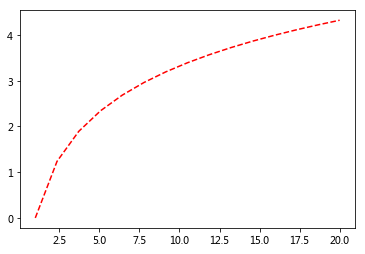

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

lineX = np.linspace(1,20, 15)
y=np.log2(lineX)

plt.figure(1, facecolor='white')
plt.plot(lineX, y, 'r--')
plt.show()

我们现在需要关心的是什么时候相等。如下图所示的凸函数:![images](images/09/01.png)

无论是凸函数还是凹函数，当且仅当自变量X是常数的时候，等式成立

##4.3 结论与推导
由于函数$f(x)=log(x)$为凹函数(其二次导数为$-\frac{1}{x^2}<0$),而且由于$\sum_{z^{{i}}}Q_i(z^{(i)})*\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$是$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}$的期望。根据Jenson不等式，有$E[f(X)]<=f(E[X]) \Rightarrow f(E[X])>=E[f(X)]$,由$\because \sum_zQ_i(z^{(i)})=1$,$\therefore f(E_{z^{(i)}-Q_i}[\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}]) \geq E_{z^{(i)}-Q_i}[f(\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})})]$

设置$\frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$，$\Rightarrow p(x^{(i)}, z^{(i)}; \theta)=Q_i(z^{(i)})C \Rightarrow \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=\sum_{z=1}^nQ_i(z^{(i)})C$

$\therefore \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C*\sum_{z=1}^nQ_i(z^{(i)})$

$\because \sum_zQ_i(z^{(i)})=1$

$\therefore \sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=C$

$\because \frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}=C$

$\therefore Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{C} \Rightarrow Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)}$

根据全概率公式，有：$\sum_{z=1}^np(x^{(i)}, z^{(i)}; \theta)=p(x^{(i)};\theta)$

$\therefore Q_i(z^{(i)})=\frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}$

又根据条件概率公式，有$ Q_i(z^{(i)})=p(z^{(i)}|x^{(i)};\theta)$
所以就有了EM算法的伪代码如下:
- 初始化分布参数$\theta$
- 重复以下步骤并收敛
> - E步:$Q_i(z^{i}) := \frac{p(x^{(i)}, z^{(i)}; \theta)}{p(x^{(i)};\theta)}$,固定$\theta$优化Q
> - M步：$\theta := argmax_{\theta}\sum_i\sum_{z^{(i)}}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}; \theta)}{Q_i(z^{(i)})}$,固定Q优化$\theta$

M步具体的$p(x^{(i)})$，需要根据具体的模型来计算

高斯混合模型可以看作M个高斯密度函数的线性组合

E步要得到隐变量的分布，具体到身高的例子，就是要得到每一个样本是男性的概率是多少，是女性的概率是多少，注意归一化

M步就是要得到结果，具体到身高的例子，就是要得到高斯分布的均值和标准差


对于M步，由于$Q_i(z^{i})$在E步已经得到了结果，所以M步主要是展开$p(x^{(i)},z^{(i)}; \theta)$，具体到身高的例子，由于是高斯分布，所以推导如下：

$\sum_i\sum_{z^(i)}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}; \theta)}{Q_i(z^{(i)})}=\sum_i\sum_{z^(i)}Q_i(z^{(i)})log\frac{p(x^{(i)},z^{(i)}; \Phi,\mu,\sum)}{Q_i(z^{(i)})}$

$=\sum_{i=1}^m\sum_{j=1}^kQ_i(z^{{i}}=j)log\frac{p(x^{(i)}|z^{(i)}=j;\mu,\sum)p(z^{(i)}=j;\Phi)}{Q(z^{(i)}=j)}$

##4.4 证明EM算法是收敛的
假定$\theta^t$和$\theta^{t+1}$是EM第t次和t+1次迭代后的结果，如果我们证明了$\varphi(\theta^t) \leq \varphi(\theta^{t+1})$，也就是说极大似然估计单调增加，那么最终我们会达到最大似然估计的最大值。

证明:选定$\theta^t$后，我们得到E步
![images](images/06/10.png)

#6 具体解法
E步就是根据输入的样本、均值和标准差来计算每个样本属于每一个分类的概率

M步就是通过得到的这个概率，然后计算新的均值和标准差，交给E步进行下一次迭代

高斯混合模型可以看作M个高斯密度函数的线性组合